In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Survey.csv")
df

,Unnamed: 0,问卷图片顺序,algorithm,label_orig,label,prediction,index in 200,index in total,count of considering numbers among 13,count of correct lables
0,lava,cvae,v,6,org6,pred5,124,index534,1,0
1,lava,cvae,v,4,org4,pred5,73,index3172,5,1
2,lava,vae,v,4,org4,pred8,187,index3042,8,0
3,dlfuzz,NaN,NaN,4,org4,pred2,62,index1956,13,13
4,fgsm,NaN,NaN,6,org6,pred0,109,index2737,13,13
...,...,...,...,...,...,...,...,...,...,...
105,lava,cvae,v,2,org2,pred3,155,index4582,5,0
106,lava,vae,bp,9,org9,pred4,170,index9319,7,8
107,lava,cvae,v,9,org9,pred8,181,index3160,1,0
108,lava,cae,v,4,org4,pred1,157,index9728,5,1


In [3]:
df['algorithm_name'] = df.apply(lambda row: f"{row['Unnamed: 0']}_{row['问卷图片顺序']}_{row['algorithm']}", axis=1)
df

,Unnamed: 0,问卷图片顺序,algorithm,label_orig,label,prediction,index in 200,index in total,count of considering numbers among 13,count of correct lables,algorithm_name
0,lava,cvae,v,6,org6,pred5,124,index534,1,0,lava_cvae_v
1,lava,cvae,v,4,org4,pred5,73,index3172,5,1,lava_cvae_v
2,lava,vae,v,4,org4,pred8,187,index3042,8,0,lava_vae_v
3,dlfuzz,NaN,NaN,4,org4,pred2,62,index1956,13,13,dlfuzz_nan_nan
4,fgsm,NaN,NaN,6,org6,pred0,109,index2737,13,13,fgsm_nan_nan
...,...,...,...,...,...,...,...,...,...,...,...
105,lava,cvae,v,2,org2,pred3,155,index4582,5,0,lava_cvae_v
106,lava,vae,bp,9,org9,pred4,170,index9319,7,8,lava_vae_bp
107,lava,cvae,v,9,org9,pred8,181,index3160,1,0,lava_cvae_v
108,lava,cae,v,4,org4,pred1,157,index9728,5,1,lava_cae_v


In [4]:
df['algorithm_name'] = df['algorithm_name'].str.replace('_nan_nan', '')
df = df.drop(columns=['Unnamed: 0', '问卷图片顺序', 'algorithm'])

In [5]:
import matplotlib.pyplot as plt

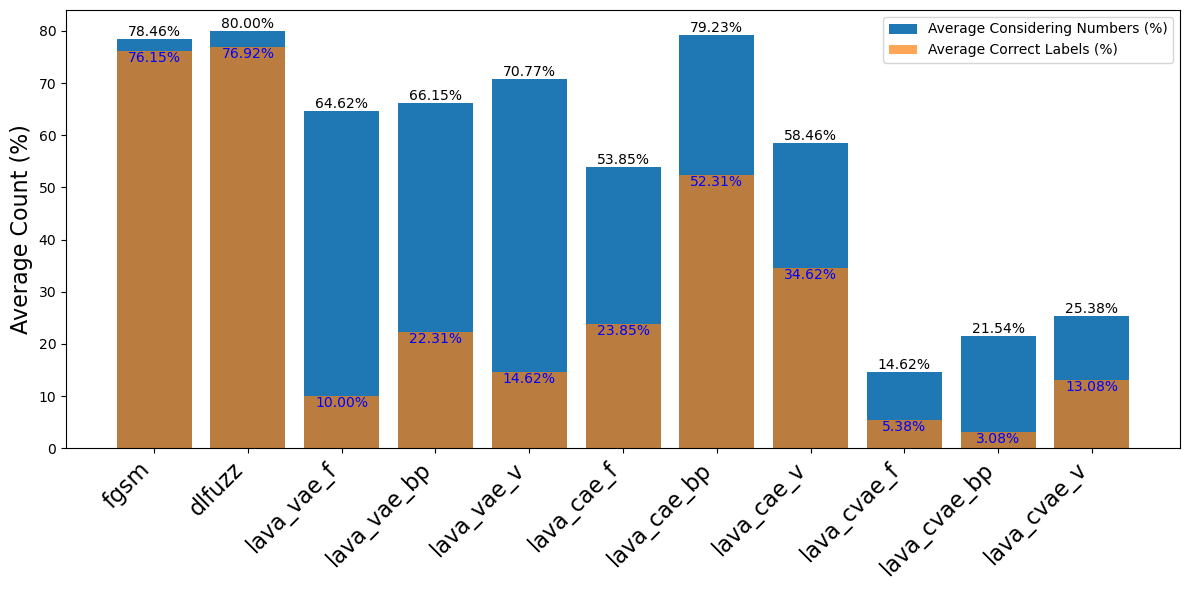

In [9]:
# Define the desired order for the x-axis
desired_order = ['fgsm', 'dlfuzz', 'lava_vae_f', 'lava_vae_bp', 'lava_vae_v', 'lava_cae_f', 'lava_cae_bp', 'lava_cae_v', 'lava_cvae_f', 'lava_cvae_bp', 'lava_cvae_v']

# Calculate the averages
algorithm_averages = df.groupby('algorithm_name').mean().reset_index()

# Rename columns for clarity
algorithm_averages.rename(columns={
    'count of considering numbers among 13': 'average_count_considering_numbers',
    'count of correct lables': 'average_count_correct_labels'
}, inplace=True)

# Divide all relevant columns by 13 to convert to percentage
algorithm_averages[['average_count_considering_numbers', 'average_count_correct_labels']] = algorithm_averages[['average_count_considering_numbers', 'average_count_correct_labels']] / 13 * 100

# Ensure all necessary columns are strings and sort the dataframe by the desired order
algorithm_averages['algorithm_name'] = pd.Categorical(algorithm_averages['algorithm_name'], categories=desired_order, ordered=True)
algorithm_averages = algorithm_averages.sort_values('algorithm_name')

# Plot the averages as a bar chart with percentages
fig, ax = plt.subplots(figsize=(12, 6))

# Plot for average count of considering numbers
ax.bar(algorithm_averages['algorithm_name'], algorithm_averages['average_count_considering_numbers'], label='Average Considering Numbers (%)')
for idx, val in enumerate(algorithm_averages['average_count_considering_numbers']):
    ax.text(idx, val, f"{val:.2f}%", ha='center', va='bottom')

# Plot for average count of correct labels
ax.bar(algorithm_averages['algorithm_name'], algorithm_averages['average_count_correct_labels'], label='Average Correct Labels (%)', alpha=0.7)
for idx, val in enumerate(algorithm_averages['average_count_correct_labels']):
    ax.text(idx, val, f"{val:.2f}%", ha='center', va='top', color='blue')

# Setting labels and title
#ax.set_xlabel('Algorithm Name')
ax.set_ylabel('Average Count (%)', fontsize=16)
#ax.set_title('Average Percentage of Considering Numbers and Correct Labels for Each Algorithm')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=16)

# Show plot
plt.tight_layout()
plt.savefig('survey_result.pdf')
plt.show()